In [1]:
%matplotlib inline
import sys
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

plt.rcParams['axes.unicode_minus'] = False

# 운영체제별로 기본 폰트가 다릅니다.
if "darwin" in sys.platform:
    plt.rcParams['font.family'] = 'AppleGothic'  # 맥 기본 폰트
elif "win" in sys.platform:
    plt.rcParams['font.family'] = 'Malgun Gothic'  # 윈도우 기본 폰트
else:
    print(f"{sys.platform}은 폰트 직접 지정이 필요합니다.")  # 윈도우/맥 외에 리눅스 등의 플랫폼
    sys.exit(1)

from tqdm import tqdm_notebook   # pip install tqdm
from libs import stock_daum, stock_naver

## 실시간 국내증시 인기검색 종목 크롤링

In [2]:
df = stock_naver.get_실시간_국내증시_인기검색종목()
print(df.shape)
df

(10, 4)


,종목코드,direction,거래가,url
종목명,,,,
삼성전자,005930,up,61000,https://finance.naver.com/item/main.naver?code...
SK하이닉스,000660,up,184900,https://finance.naver.com/item/main.naver?code...
펩트론,087010,up,50200,https://finance.naver.com/item/main.naver?code...
유한양행,000100,up,148100,https://finance.naver.com/item/main.naver?code...
흥구석유,024060,dn,21050,https://finance.naver.com/item/main.naver?code...
HLB,028300,dn,85000,https://finance.naver.com/item/main.naver?code...
에코프로비엠,247540,up,192700,https://finance.naver.com/item/main.naver?code...
NAVER,035420,dn,166100,https://finance.naver.com/item/main.naver?code...
두산에너빌리티,034020,up,18270,https://finance.naver.com/item/main.naver?code...


## 시각화

<Axes: xlabel='종목명'>

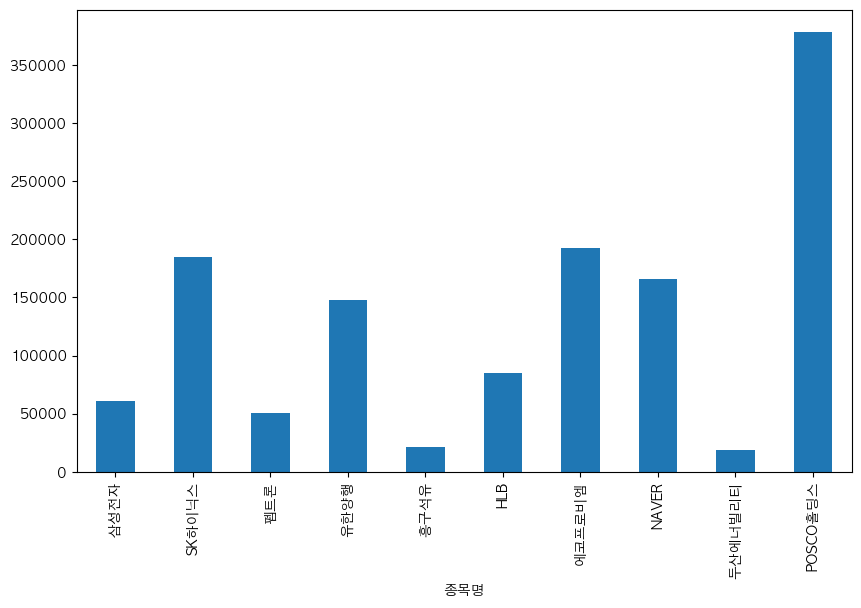

In [3]:
df['거래가'].plot(kind='bar', figsize=(10, 6))

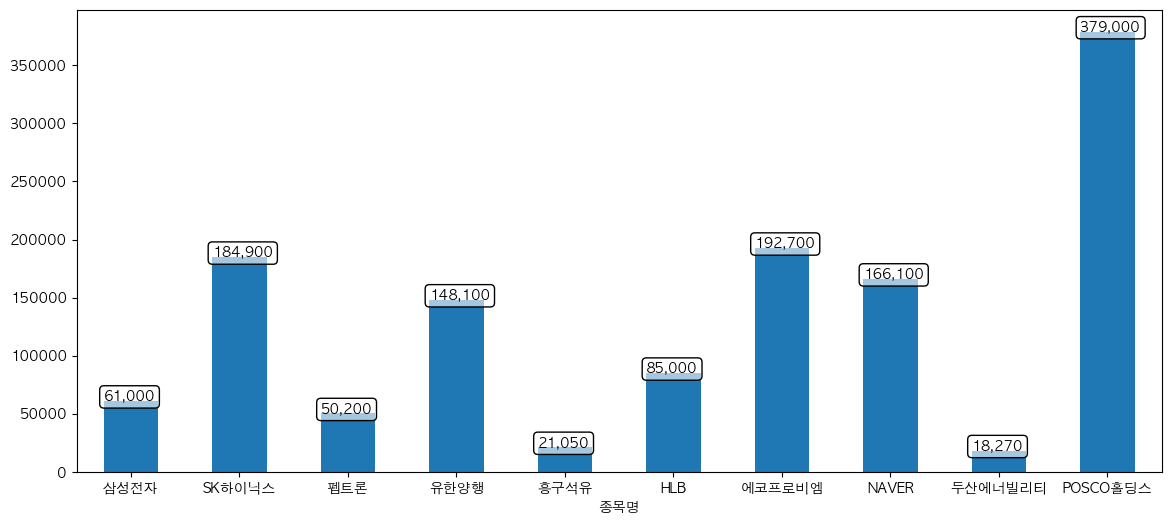

In [4]:
ax = df['거래가'].plot(kind='bar', figsize=(14, 6), rot=0)

for p in ax.patches:
    box = p.get_bbox()  # matplotlib.transforms.Bbox 타입 (x0, y0, x1, y1 속성)
    
    x = box.xmin
    y = box.ymax
    text = "{:,}".format(int(box.ymax))
    
    # https://matplotlib.org/users/annotations.html
    ax.text(x, y, text, bbox={'boxstyle': 'round', 'fc': '#ffffff99'})